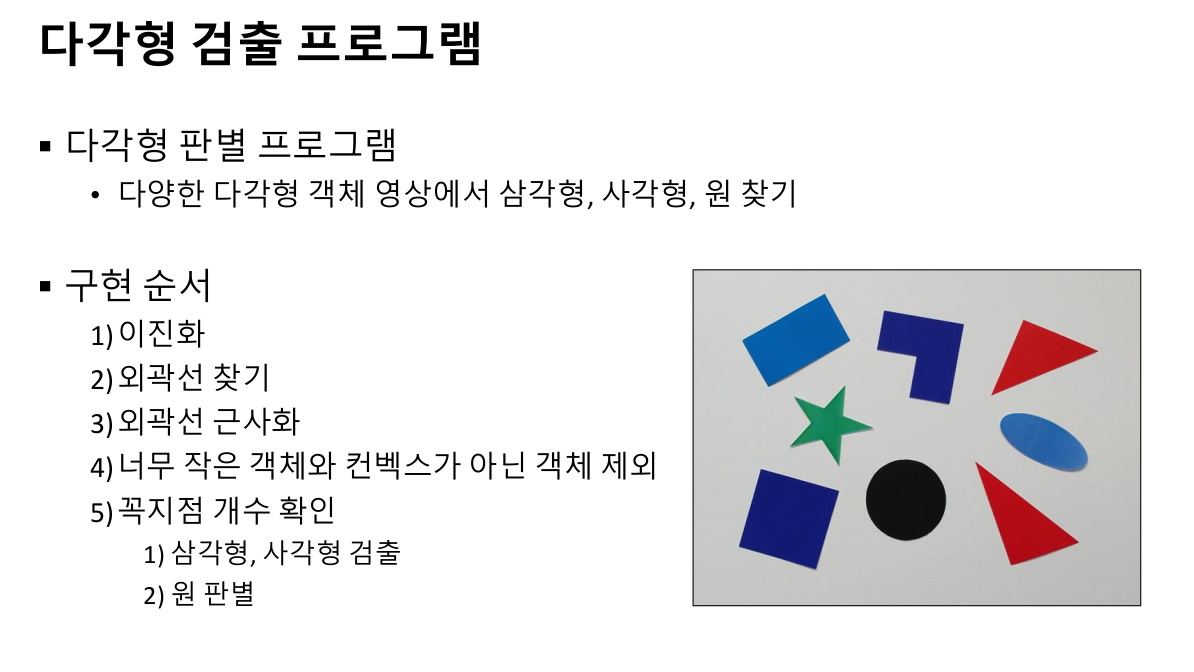

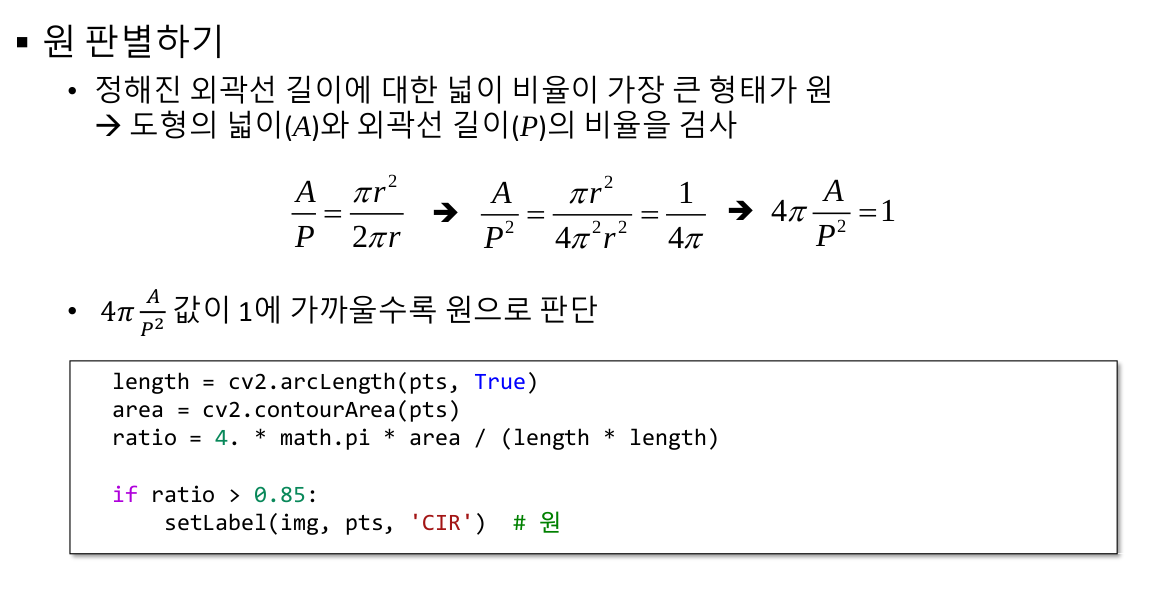

In [5]:
import math
import cv2

In [6]:
def setLabel(img, pts, label):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2 ,(0 ,0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1 ,(0 , 0, 255))

In [7]:
def main():
    img = cv2.imread('../data/polygon.bmp', cv2.IMREAD_COLOR)
    
    if img is None:
        print('Image load failed!')
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV| cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    for pts in contours:
        if cv2.contourArea(pts) < 400:
            continue
            
        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)
        
        vtc = len(approx)
       
    
        if vtc == 3:
            setLabel(img, pts, 'TRI')
        elif vtc == 4:
            setLabel(img, pts, 'RECT')
        else:
            length = cv2.arcLength(pts, True)
            area = cv2.contourArea(pts)
            ratio = 4. * math.pi * area / (length * length)

            if ratio > 0.85:
                setLabel(img, pts, 'CIR')

    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [8]:
if __name__ == '__main__':
    main()